# BLOB anaysis
## Lecture exercises

In [1]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation, measure
from skimage.color import label2rgb
from skimage.morphology import erosion, dilation, opening, closing, disk

### Exercise 1

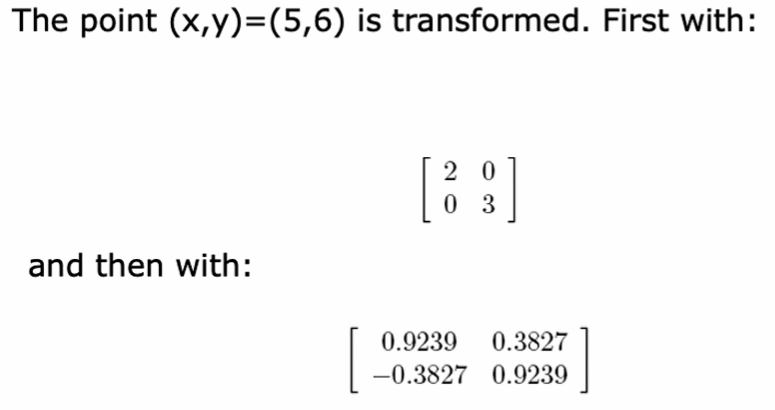

In [56]:
xy = np.transpose([5,6])
m1 = np.matrix([[2,0],[0,3]])
m2 = np.matrix([[0.9239,0.3827],[-0.3827,0.9239]])


first = np.matmul(m1, xy)
print('First part \n', m1, '*', xy, ' = ', first, '\n')

print('Transpose metrix')
first_T = np.transpose(first)
print(firste_T, '\n')

second = np.matmul(m2,first_T)
print('Second part\n',m2, '*\n\n', first_T, '=\n\n', second)

First part 
 [[2 0]
 [0 3]] * [5 6]  =  [[10 18]] 

Transpose metrix
[[10]
 [18]] 

Second part
 [[ 0.9239  0.3827]
 [-0.3827  0.9239]] *

 [[10]
 [18]] =

 [[16.1276]
 [12.8032]]


### Exercise 2

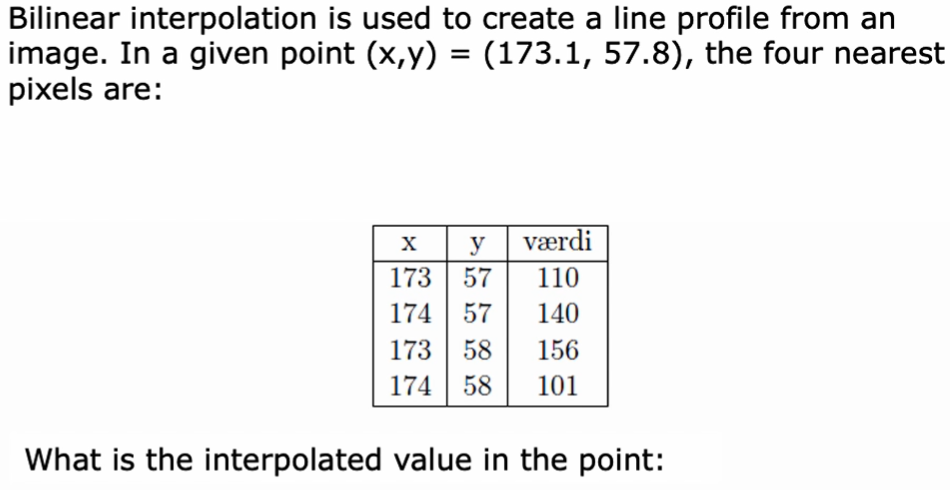

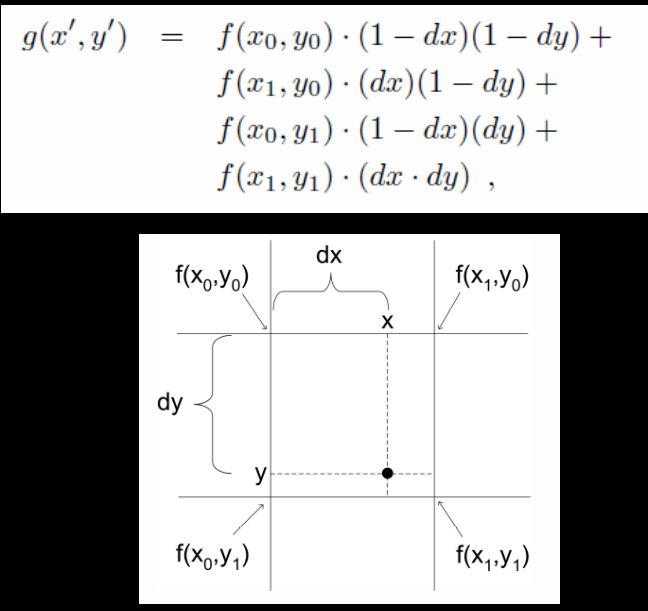

In [92]:
x = 173.1
y = 57.8

# From f(x0,y0) to the point there's
dx = x-173
dy = y-57

def g(x, y, dx, dy):
    f1 = 110*(1-dx)*(1-dy)
    f2 = 140*dx*(1-dy)
    f3 = 156*(1-dx)*dy
    f4 = 101*dx*dy
    return f1+f2+f3+f4

print('The interpolated value in point [', x, ',',y,'] is', g(x,y, dx, dy))
    

The interpolated value in point [ 173.1 , 57.8 ] is 143.00000000000009


### Exercise 3
Transformed = multiplied (np.matmul)

Translates = Added

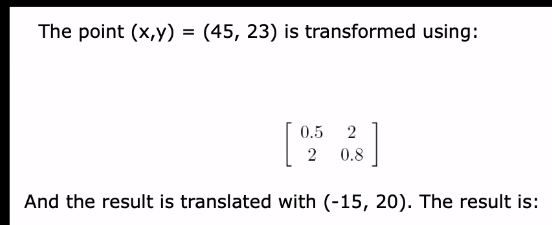

In [124]:
def transformation(a,x,b):
    s1 = np.matmul(a,x)
    return s1 + b

xy = np.transpose([45,23])
a = np.matrix([[0.5,2],[2,0.8]])
b = [-15,20]

print(transformation(a,xy,b))

[[ 53.5 128.4]]


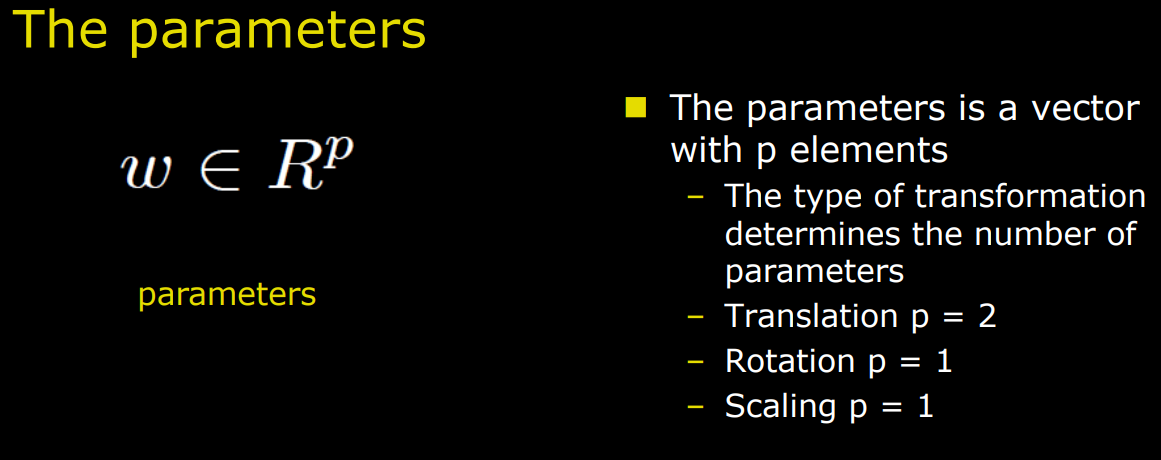

### Exercise 4
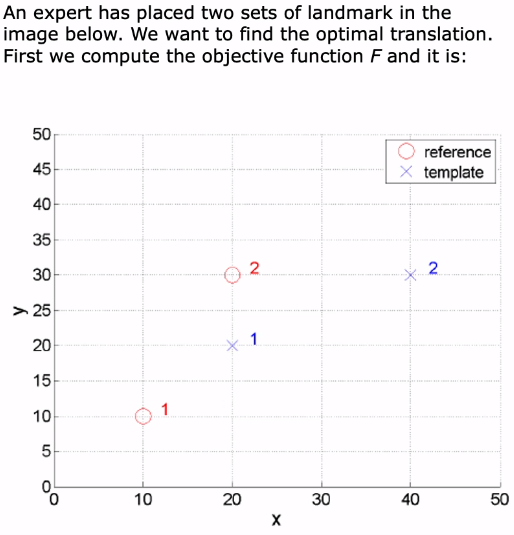

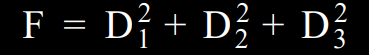

In [126]:
## In the x plan and in the y-plan
d1 = 10**2+10**2

# Same, but as it's only x there's moving..
d2 = 20**2

d1+d2

600

In [132]:
red1 = np.matrix([10,10])
blue1 = np.matrix([20,20])

red2 = np.matrix([20,30])
blue2 = np.matrix([40,30])

d1 = np.square(red1-blue1)
d2 = np.square(red2-blue2)

np.sum(d1+d2)

600

### Exercise 5: BLOBs with 4-and-8-connectivity
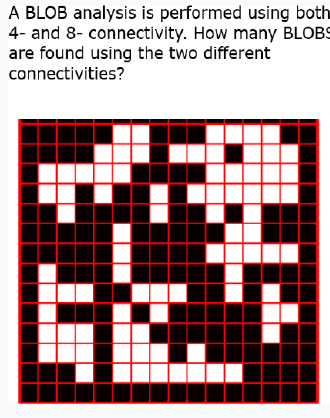
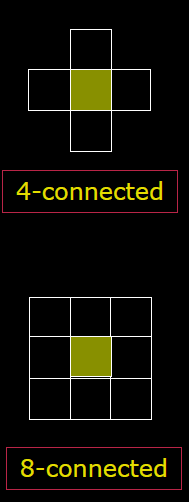

- for 8-connectivity we have 8 blobs
- for 4-connectivity we have 6, as there's no 'direct' bridge



# BLOB Analysis in Python

In [3]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                  sharey=True)
    ax1.imshow(original) #, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

In [4]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

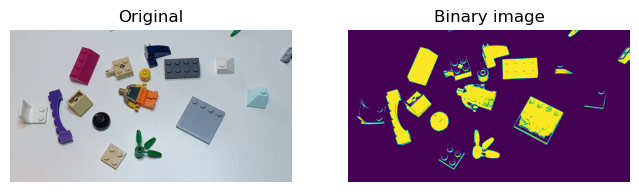

In [5]:
# Load image
im_org = io.imread('data/' + 'lego_4_small.png')

# Convert to grey

im_grey = color.rgb2gray(im_org)

# To ubyte
im_lego = img_as_ubyte(im_grey)

# Otsu threshold
thresh = threshold_otsu(image=im_lego)
bin_img = im_lego <= thresh

show_comparison(im_org, bin_img, 'Binary image')

### Exercise 2: Remove border BLOBs

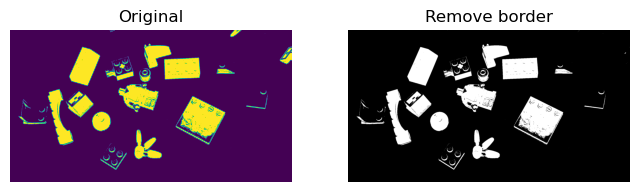

In [170]:
seg = segmentation.clear_border(bin_img)
show_comparison(bin_img, seg, 'Remove border')

### Exercise 3: Cleaning using morphological operations

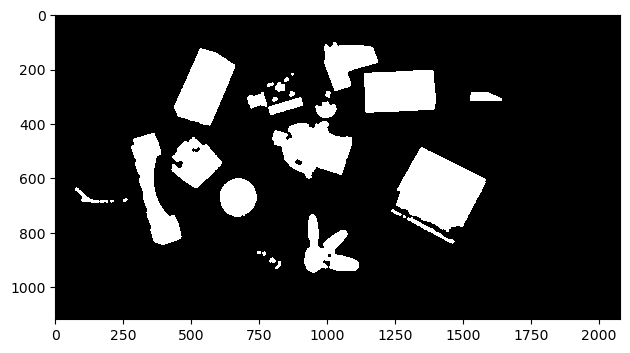

In [176]:
footprint = morphology.disk(5)
im_process = morphology.binary_closing(seg, footprint)
im_open = morphology.binary_opening(im_process, footprint)
io.imshow(im_open)
io.show()

### Exercise 4: Find labels

In [177]:
label_img = measure.label(im_open)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 31


### Exercise 5: Visualize found labels
We can use the function label2rbg to create a visualization of the found BLOBS. Show this together with the original image.

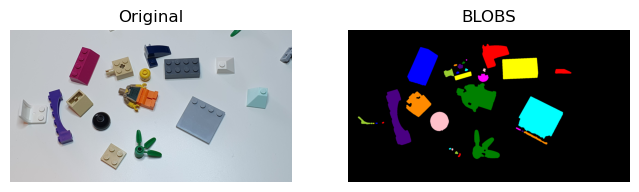

In [180]:
im_blob = label2rgb(label_img)
show_comparison(im_org, im_blob, 'BLOBS')

### Exericse 6: Compute BLOB features
It is possible to compute a wide variety of BLOB features using the measure.regionprops function:

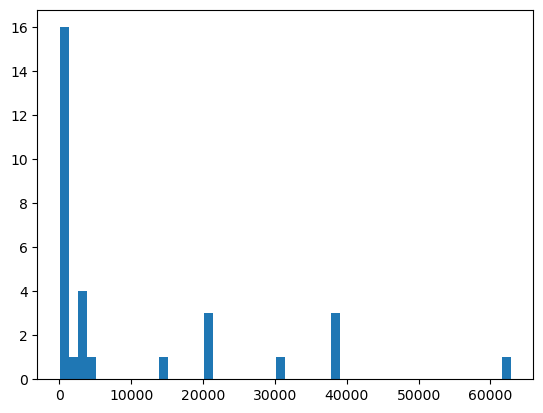

In [181]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

### Exercise 7: Exploring BLOB features

In [183]:
!python data/Ex5-BlobAnalysisInteractive.py

# Cell counting
The goal of this part of the exercise, is to create a small program that can automatically count the number of cell nuclei in an image.

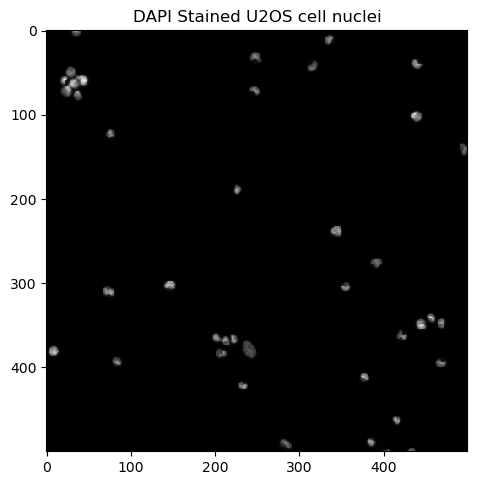

In [6]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
plt.show()

Text(0.5, 1.0, 'Full image')

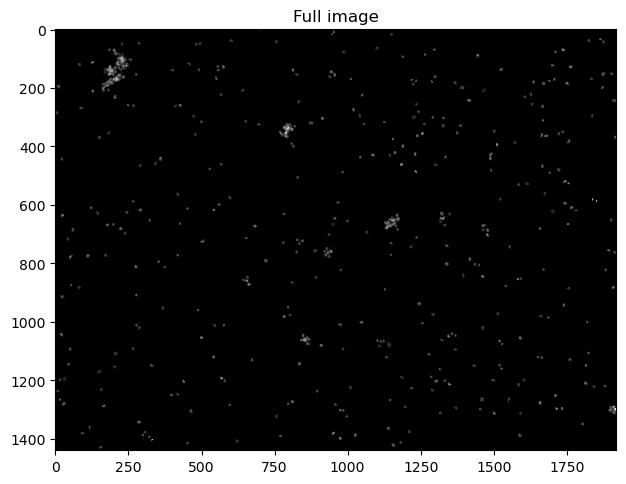

In [7]:
io.imshow(img_org)
plt.title('Full image')

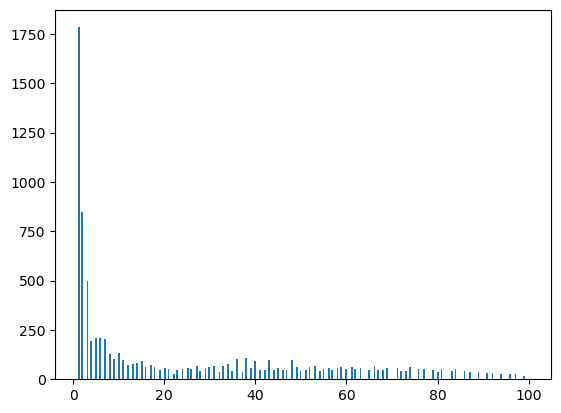

In [8]:
# avoid bin with value 0 due to the very large number of background pixels
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

### Exercise 8: Threshold selection
Select an appropriate threshold, that seperates nuclei from the background. You can set it manually or use Otsus method.

Show the binary image together with the original image and evaluate if you got the information you wanted in the binary image.

It can be seen that there is some noise (non-nuclei) present and that some nuclei are connected. Nuclei that are overlapping very much should be discarded in the analysis. However, if they are only touching each other a little we can try to separate them. More on this later.

To make the following analysis easier the objects that touches the border should be removed.

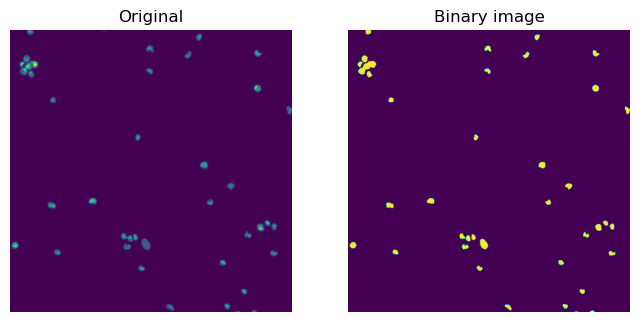

In [9]:
# To ubyte
#im_ubyte = img_as_ubyte(img_gray)

# Otsu threshold
thresh = threshold_otsu(image=img_gray)
bin_img = img_gray > thresh

show_comparison(img_gray, bin_img, 'Binary image')

### Exercise 9: Remove border BLOBS

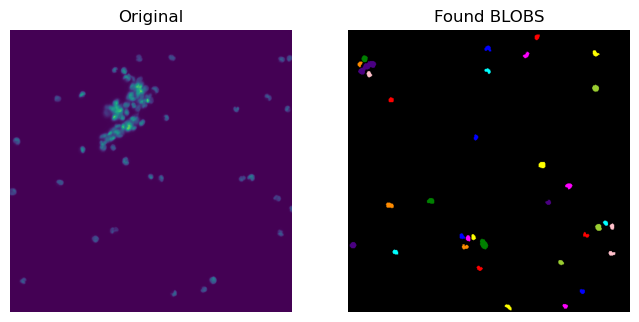

Number of labels: 34


In [10]:
seg = segmentation.clear_border(bin_img)
label_img = measure.label(seg)
image_label_overlay = color.label2rgb(label_img)
show_comparison(img_org, image_label_overlay, 'Found BLOBS')
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

### Exercise 10: BLOB features
The task is now to find some object features that identify the cell nuclei and let us remove noise and connected nuclei. We use the function regionprops to compute a set of features for each object:

In [11]:
# Area of the first object
region_props = measure.regionprops(label_img)
region_props[0].area

# Gather all areas
areas = np.array([prop.area for prop in region_props])

min: 60 max: 360


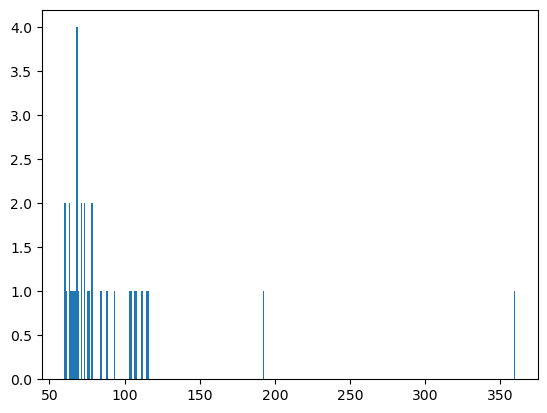

In [12]:
minh = np.min(areas)
maxh = np.max(areas)
print('min:', minh, 'max:', maxh)
plt.hist(areas.ravel(), bins=300, range=(minh, maxh))
io.show()

### Exercise 11: BLOB classification by <ins>area</ins>
Select a minimum and maximum allowed area and use the following to visualise the result:

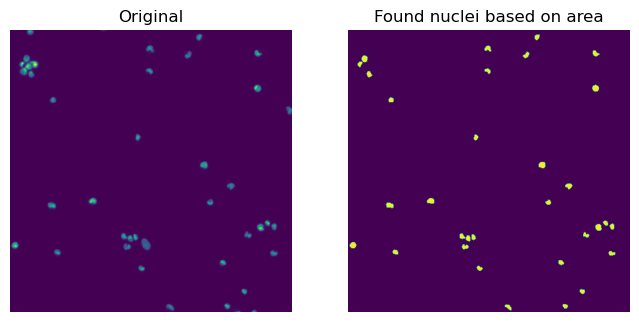

In [13]:
min_area = 60
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area > max_area or region.area < min_area:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

### Exercise 12: Feature space
Extract all the perimeters of the BLOBS. Perimeters are the omkreds

In [56]:
areas = np.array([prop.area for prop in region_props])
perimeters = np.array([prop.perimeter for prop in region_props])

### Filtering area and perimeter

In [48]:
min_area = 60
max_area = 150

filtered_areas = np.array([prop.area for prop in region_props])
filtered_perimeters = np.array([prop.perimeter for prop in region_props])
counter = 0

for i in range(0,len(areas)):
    if areas[i] > max_area or areas[i] < min_area:
        filtered_areas = np.delete(filtered_areas, i - counter )
        filtered_perimeters = np.delete(filtered_perimeters, i -counter)
        counter =+ 1


### Filtered vs. unfiltered area and perimeter

min: 0.5137249089202347 max: 1.0816630244914995


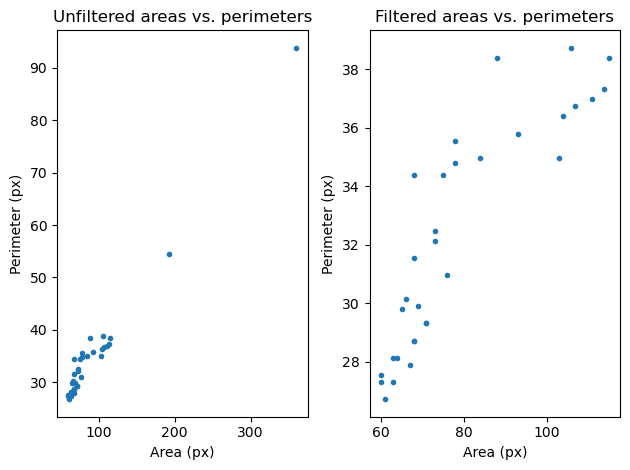

In [47]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(areas, perimeters,'.')
axes[0].set_title('Unfiltered areas vs. perimeters')
axes[0].set_xlabel('Area (px)')
axes[0].set_ylabel('Perimeter (px)')
axes[1].plot(filtered_areas, filtered_perimeters,'.')
axes[1].set_title('Filtered areas vs. perimeters')
axes[1].set_xlabel('Area (px)')
axes[1].set_ylabel('Perimeter (px)')

fig.tight_layout()
plt.show()

### Exercise 13: BLOB Circularity
We should also examine if the shape of the cells can identify them. A good measure of how circular an object is can be computed as:

$$
f_\text{circ} = \frac{4 \pi A}{P^2},
$$

where  𝐴
  is the object area and  𝑃
  is the perimeter. A circle has a circularity close to 1, and very-non-circular object have circularity close to 0.

In [66]:
def f_circle(A,P):
    upper = 4*np.pi*A
    return upper/(P**2)

circularity = []
for i in range(0,len(areas)):
    circularity.append(f_circle(areas[i], perimeters[i]))
    

In [39]:
# Filtered based on area and perimeter
filtered_circularity = []
for i in range(0,len(filtered_areas)):
    filtered_circularity.append(f_circle(filtered_areas[i], filtered_perimeters[i]))

min: 0.5137249089202347 max: 1.0816630244914995


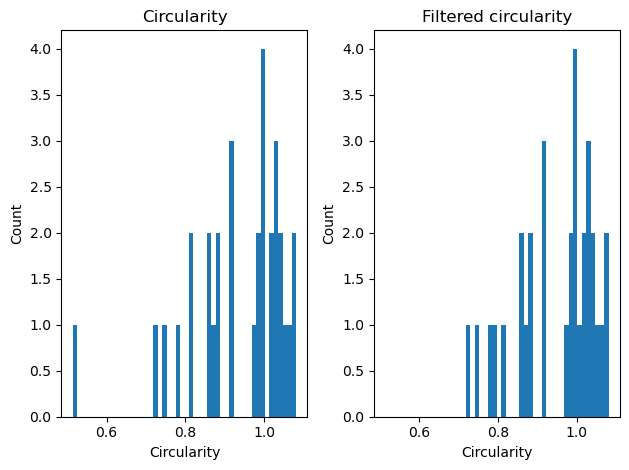

In [54]:
minh = np.min(circularity)
maxh = np.max(circularity)
print('min:', minh, 'max:', maxh)

fig, axes = plt.subplots(1, 2)
axes[0].hist(circularity, bins=50, range=(minh, maxh))
axes[0].set_title('Circularity')
axes[0].set_xlabel('Circularity')
axes[0].set_ylabel('Count')
axes[1].hist(filtered_circularity, bins=50, range=(minh, maxh))
axes[1].set_title('Filtered circularity')
axes[1].set_xlabel('Circularity')
axes[1].set_ylabel('Count')

fig.tight_layout()
plt.show()


Number of labels: 32


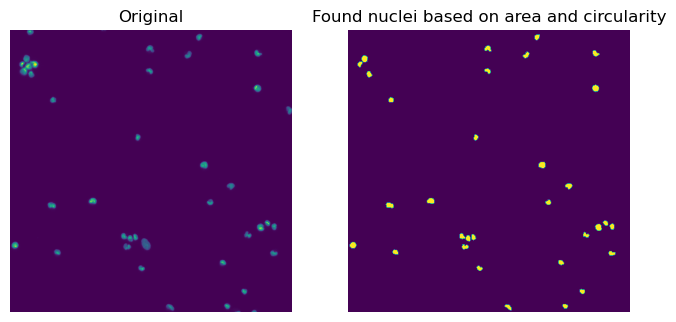

In [59]:
min_circ = 0.7
min_area = 60 
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img

objects = len(region_props)
    
for region in region_props:
    
    circ = f_circle(region.area, region.perimeter)
    # Find the areas that do not fit our criteria
    if region.area > max_area or region.area < min_area or circ < min_circ:
        objects = objects - 1
        # set the pixels in the invalid areas to background        
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
            
# Create binary image from the filtered label image
i_area = label_img_filter > 0

print(f"Number of labels: {objects}")

show_comparison(img_small, i_area, 'Found nuclei based on area and circularity')

### Exercise 14: BLOB circularity and area
Try to plot the areas versus the circularity.

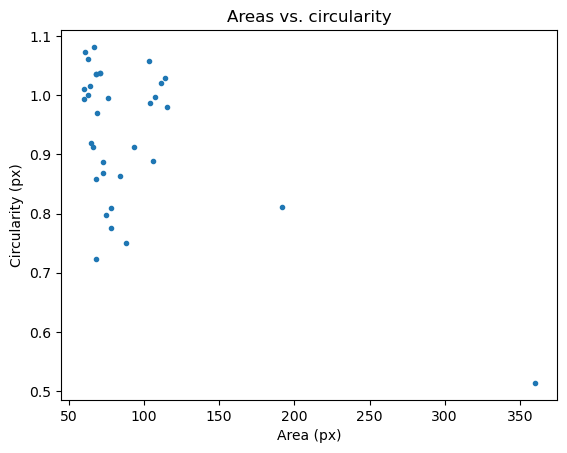

In [60]:
plt.plot(areas, circularity,'.')
plt.title('Areas vs. circularity')
plt.xlabel('Area (px)')
plt.ylabel('Circularity (px)')
plt.show()

In [61]:
def cell_counting(img_gray, min_area = 10, max_area = 150, min_circ = 0.7):

    # Binarization
    thres = threshold_otsu(img_gray)
    img_bin = img_gray > thres
    img_c_b = segmentation.clear_border(img_bin)

    # Label image
    label_img = measure.label(img_c_b)

    # Extract properties
    region_props = measure.regionprops(label_img)

    # Number of blobs
    n_nuclei = len(region_props)
    
    # Filter the label image
    label_img_filter = label_img.copy()
    for region in region_props:
        circ = f_circle(region.area, region.perimeter)
        # Find the areas that do not fit our criteria
        if region.area > max_area or region.area < min_area or circ < min_circ:
            # set the pixels in the invalid areas to background
            n_nuclei = n_nuclei - 1
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

    # Create binary image from the filtered label image
    i_area = label_img_filter > 0

    return i_area, n_nuclei

### Exercise 15: large scale testing
Try to test the method on a larger set of training images. Use slicing to select the different regions from the raw image.

In [63]:
def im2patch(im, patch_size=[256,256]):
    """
    Fancy function to rearrange an image into patches (Not important).
    
    Arguments:
        image: a 2D image, shape (r,c).
        patch size: size of extracted paches.
    Returns:
        patches: a 3D array which in every 3rd dimension has a patch associated 
    """
    
    r,c = im.shape
    s0, s1 = im.strides    
    nrows =r-patch_size[0]+1
    ncols = c-patch_size[1]+1
    shp = patch_size[0],patch_size[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(im, shape=shp, strides=strd)
    out_view = out_view[:,:,::patch_size[0],::patch_size[1]].reshape(patch_size[0],patch_size[1],-1)
    return out_view

In [62]:
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
img_gray = img_as_ubyte(img_org) 

Number of patches 24


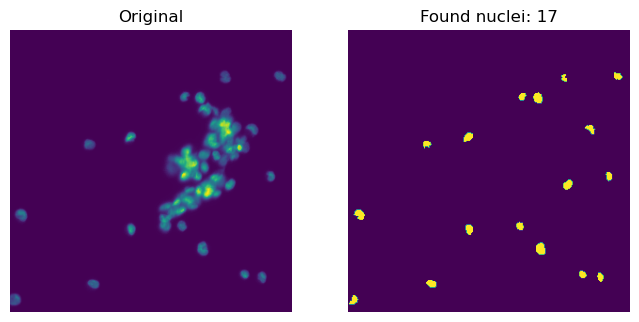

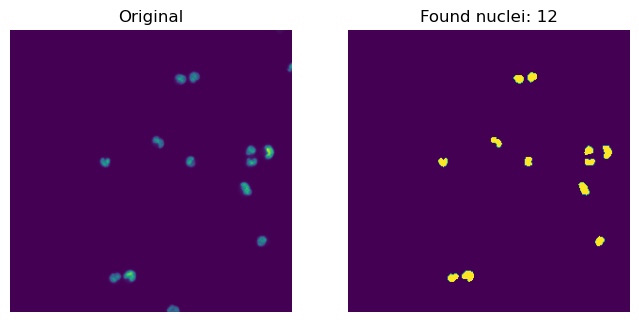

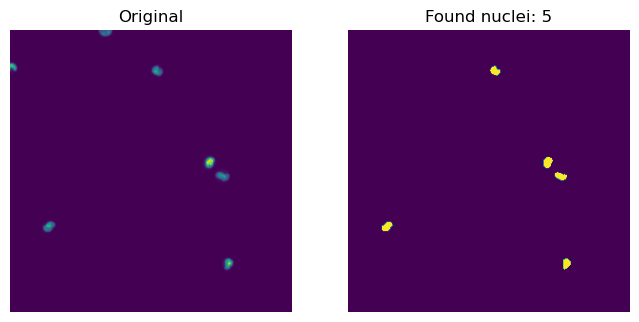

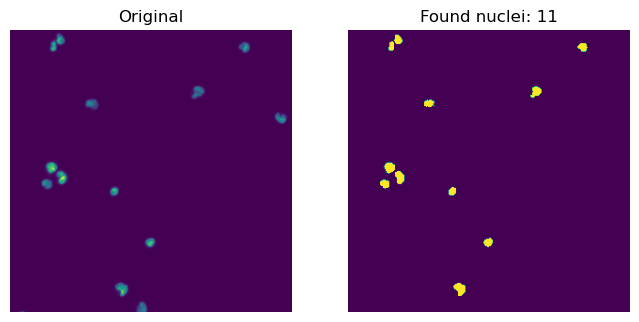

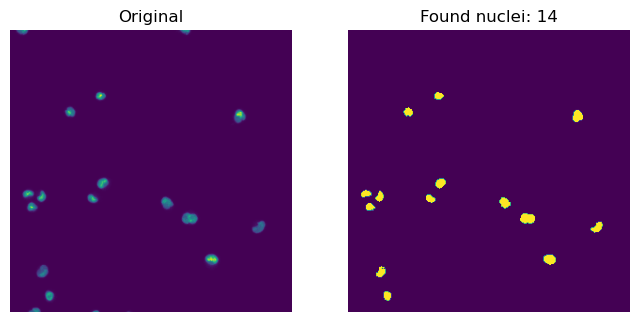

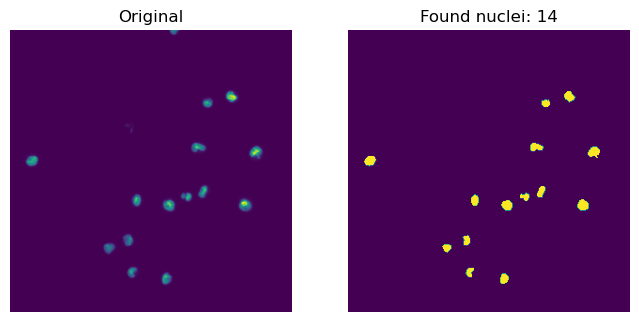

In [64]:
patches = im2patch(img_gray, patch_size=[300,300])
print(f'Number of patches {patches.shape[-1]}')

for idx_patch in range(6):
    patch = patches[:,:,idx_patch]
    filt_label, n_nuclei = cell_counting(patch)
    show_comparison(patch, filt_label, f'Found nuclei: {n_nuclei}')

### Exercise 16: COS7 cell classification¶
Try your method on the Sample G1 - COS7 cells DAPI channel.tiff image. COS7 cells are African Green Monkey Fibroblast-like Kidney Cells used for a variety of research purposes.

Number of patches 24


C:\Users\Naja-\AppData\Local\Temp\ipykernel_4504\3061016086.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return upper/(P**2)


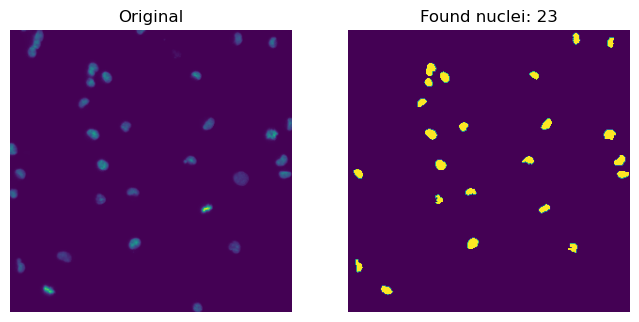

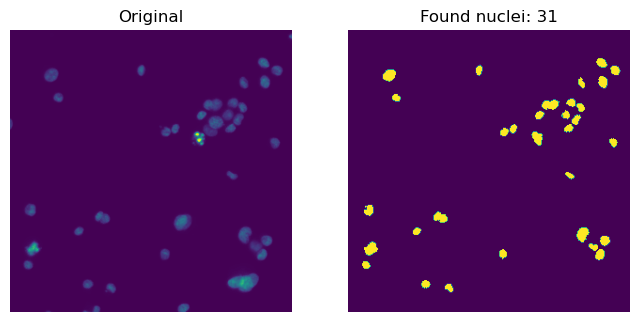

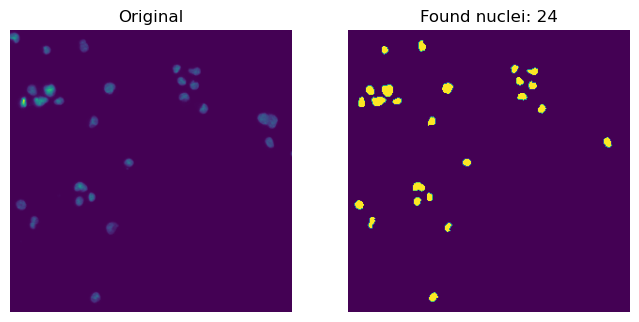

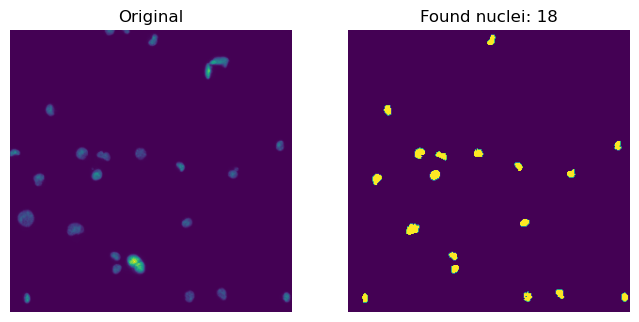

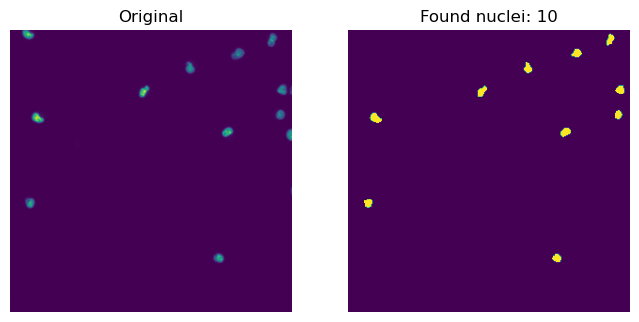

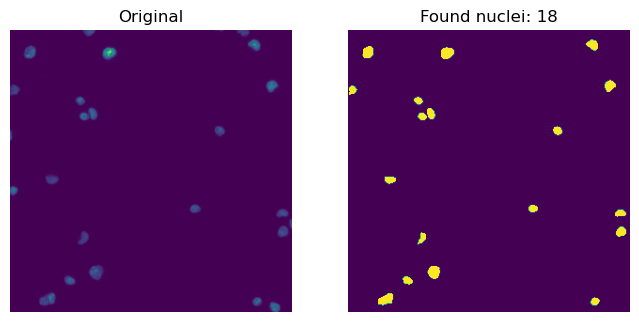

In [67]:
img_org = io.imread(in_dir + 'Sample G1 - COS7 cells DAPI channel.tiff')
# slice to extract smaller image
img_gray = img_as_ubyte(img_org)

patches = im2patch(img_gray, patch_size=[300,300])
print(f'Number of patches {patches.shape[-1]}')

for idx_patch in range(6):
    patch = patches[:,:,idx_patch]
    filt_label, n_nuclei = cell_counting(patch)
    show_comparison(patch, filt_label,  f'Found nuclei: {n_nuclei}')

In [ ]:
def cell_counting_ex17(img_gray, opening_sz = 5, min_area = 10, max_area = 150, min_circ = 0.7):

    # Binarization
    thres = threshold_otsu(img_gray)
    img_bin = img_gray > thres
    img_c_b = segmentation.clear_border(img_bin)
    img_open = morphology.binary_opening(img_c_b, morphology.disk(opening_sz))

    # Label image
    label_img = measure.label(img_open)

    # Extract properties
    region_props = measure.regionprops(label_img)
    
    # Number of blobs
    n_nuclei = len(region_props)
    
    # Filter the label image
    label_img_filter = label_img.copy()
    for region in region_props:
        circ = circularity(region.area, region.perimeter)
        # Find the areas that do not fit our criteria
        if region.area > max_area or region.area < min_area or circ < min_circ:
            n_nuclei = n_nuclei - 1
            # set the pixels in the invalid areas to background
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

    # Create binary image from the filtered label image
    i_area = label_img_filter > 0

    return i_area, n_nuclei

In [ ]:
img_org = io.imread(in_dir + 'Sample G1 - COS7 cells DAPI channel.tiff')
img_gray = img_as_ubyte(img_org)

patches = im2patch(img_gray, patch_size=[300,300])
print(f'Number of patches {patches.shape[-1]}')

for idx_patch in range(6):
    patch = patches[:,:,idx_patch]
    filt_label, n_nuclei = cell_counting_ex17(patch, opening_sz = 3)
    show_comparison(patch, filt_label, f'Found nuclei: {n_nuclei}')